In [26]:
from CellularAutomaton import *
from IPython.display import display

%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def print_grid():
    print(grid[0][0], grid[0][1], grid[0][2],'\n',
    grid[1][0], grid[1][1], grid[1][2],'\n',
    grid[2][0], grid[2][1], grid[2][2])

In [3]:
def u():
    for row in grid:
        for c in row:
            c.set_old_state()
    for row in grid:
        for c in row:
            c.update()
    gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
    print_grid()
    #MyFigure, MyAxes = plt.subplots()
    #MyAxes.matshow(gridvalues)
    #MyFigure.show()

In [13]:
def uf():
    for row in grid:
        for c in row:
            c.set_old_state()
    for row in grid:
        for c in row:
            c.update()
    gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
    #print_grid()
    MyFigure, MyAxes = plt.subplots()
    MyAxes.matshow(gridvalues)
    MyFigure.show()

<IPython.core.display.Javascript object>


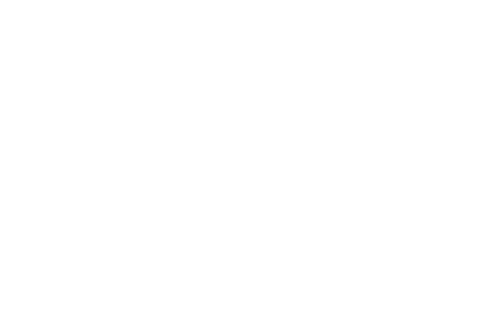

0 1 0 
 1 0 0 
 0 0 1


<IPython.core.display.Javascript object>


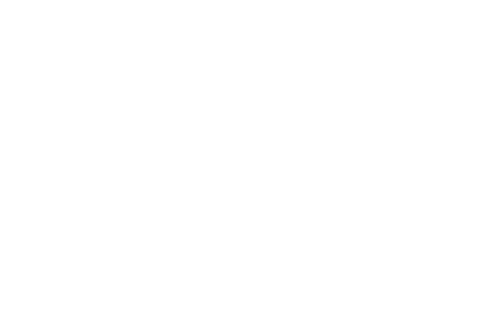

In [27]:
rows = 3
columns = 3
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()
print_grid()

In [7]:
u()

1 1 1 
 0 0 0 
 0 0 0


In [8]:
u()

1 1 1 
 0 0 0 
 0 0 0


In [9]:
u()

1 1 1 
 0 0 0 
 0 0 0


In [10]:
u()

1 1 1 
 0 0 0 
 0 0 0


In [11]:
u()

1 1 1 
 0 0 0 
 0 0 0


<IPython.core.display.Javascript object>


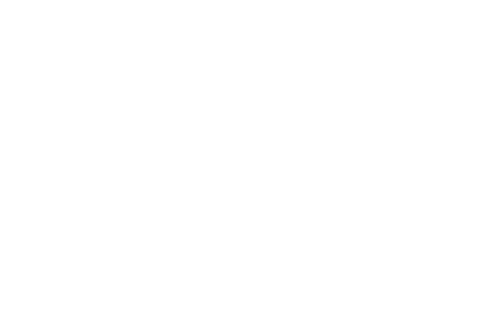

<IPython.core.display.Javascript object>


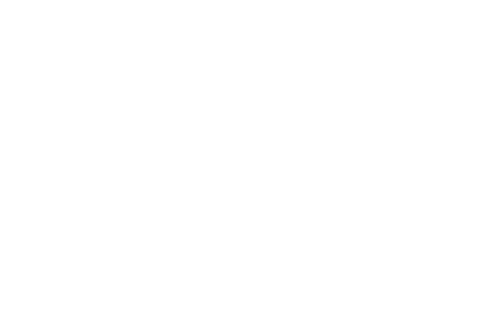

In [28]:
rows = 100
columns = 100
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

<IPython.core.display.Javascript object>


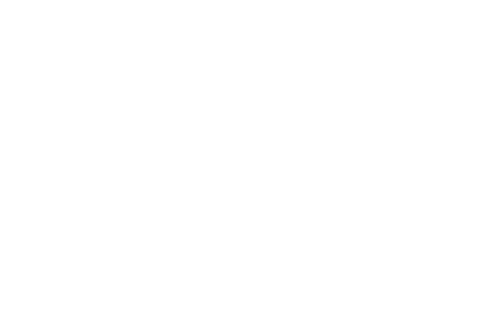

<IPython.core.display.Javascript object>


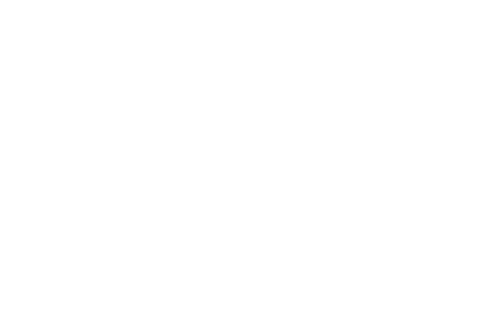

In [29]:
uf()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


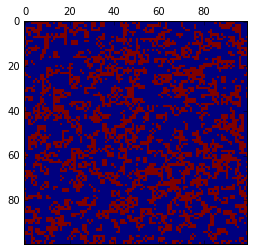

In [18]:
uf()

In [19]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [20]:
from matplotlib import animation
matplotlib.rc('animation', html='html5')

In [21]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.0 seconds long.


In [23]:
def af(n):
    uf()

In [24]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=True)

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


TypeError: 'NoneType' object is not iterable

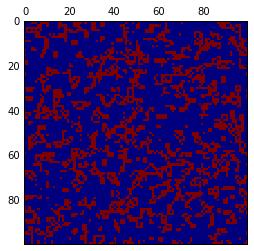

In [25]:
MyAnimation